# Is winner


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


The fourth objective attribute to be addressed will be if the driver is winner or not.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

labels = np.array(["not_winner", "winner"])
winners = df[df["positionFinal"] == 1][["raceYear", "raceRound", "driverRef"]]

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df.merge(winners, how="left", on=["raceYear", "raceRound"], suffixes=("", "Winner"))
y = y.apply(lambda x: x["driverRef"] == x["driverRefWinner"], axis=1)

## K-Nearest Neighbors


KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=1):
CV with make_scorer(balanced_accuracy_score): 0.6952493055233495
CV with neg_mean_absolute_error: nan
              precision    recall  f1-score   support

  not_winner       0.97      0.97      0.97      5049
      winner       0.41      0.41      0.41       252

    accuracy                           0.94      5301
   macro avg       0.69      0.69      0.69      5301
weighted avg       0.94      0.94      0.94      5301

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=1):
CV with make_scorer(balanced_accuracy_score): 0.6952493055233495
CV with neg_mean_absolute_error: -0.05481912149054777
              precision    recall  f1-score   support

  not_winner       0.97      0.97      0.97      5049
      winner       0.41      0.41      0.41       252

    accuracy                           0.94      5301
   macro avg       0.69      0.69      0.69      5301
weighted avg       0.94      0.94      0.94  

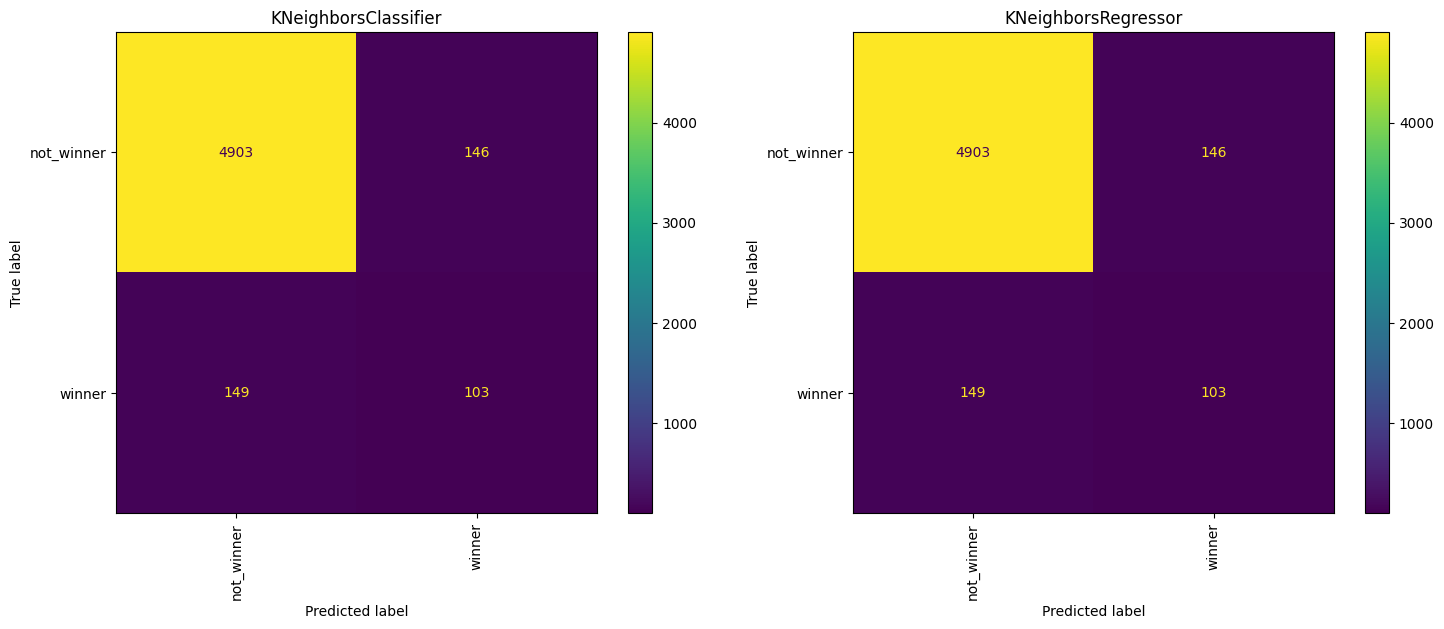

In [3]:
knn = (
    KNeighborsClassifier(n_neighbors=1, metric="euclidean", n_jobs=-1),
    KNeighborsRegressor(n_neighbors=1, metric="euclidean", n_jobs=-1),
)
model_test(knn, X, y, tscv, labels=labels)

## Decision Tree


DecisionTreeClassifier(max_depth=2):
CV with make_scorer(balanced_accuracy_score): 0.8117272535805304
CV with neg_mean_absolute_error: nan
              precision    recall  f1-score   support

  not_winner       0.98      0.97      0.98      5049
      winner       0.52      0.64      0.58       252

    accuracy                           0.95      5301
   macro avg       0.75      0.81      0.78      5301
weighted avg       0.96      0.95      0.96      5301

DecisionTreeRegressor(criterion='absolute_error', max_depth=2):
CV with make_scorer(balanced_accuracy_score): 0.634955986482516
CV with neg_mean_absolute_error: -0.05529210581201613
              precision    recall  f1-score   support

  not_winner       0.96      0.98      0.97      5049
      winner       0.43      0.27      0.33       252

    accuracy                           0.95      5301
   macro avg       0.70      0.62      0.65      5301
weighted avg       0.94      0.95      0.94      5301



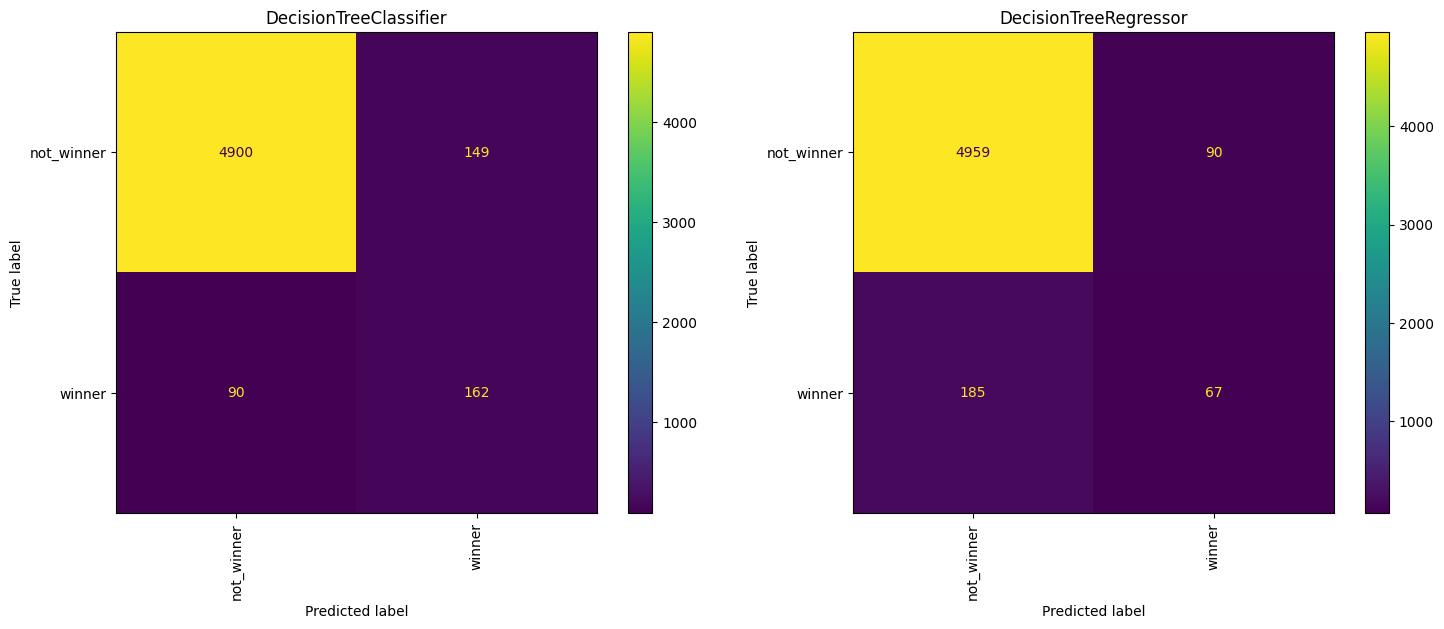

In [4]:
tree = (
    DecisionTreeClassifier(max_depth=2, criterion="gini"),
    DecisionTreeRegressor(max_depth=2, criterion="absolute_error"),
)
model_test(tree, X, y, tscv, labels=labels)

## Random Forest


RandomForestClassifier(max_depth=8, n_estimators=5, n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.6788375614252946
CV with neg_mean_absolute_error: nan
              precision    recall  f1-score   support

  not_winner       0.97      0.98      0.98      5049
      winner       0.54      0.42      0.47       252

    accuracy                           0.96      5301
   macro avg       0.75      0.70      0.73      5301
weighted avg       0.95      0.96      0.95      5301

RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=5,
                      n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.6636386431615355
CV with neg_mean_absolute_error: -0.05454184172706644
              precision    recall  f1-score   support

  not_winner       0.97      0.98      0.97      5049
      winner       0.49      0.36      0.41       252

    accuracy                           0.95      5301
   macro avg       0.73      0.67      0.69      5301
wei

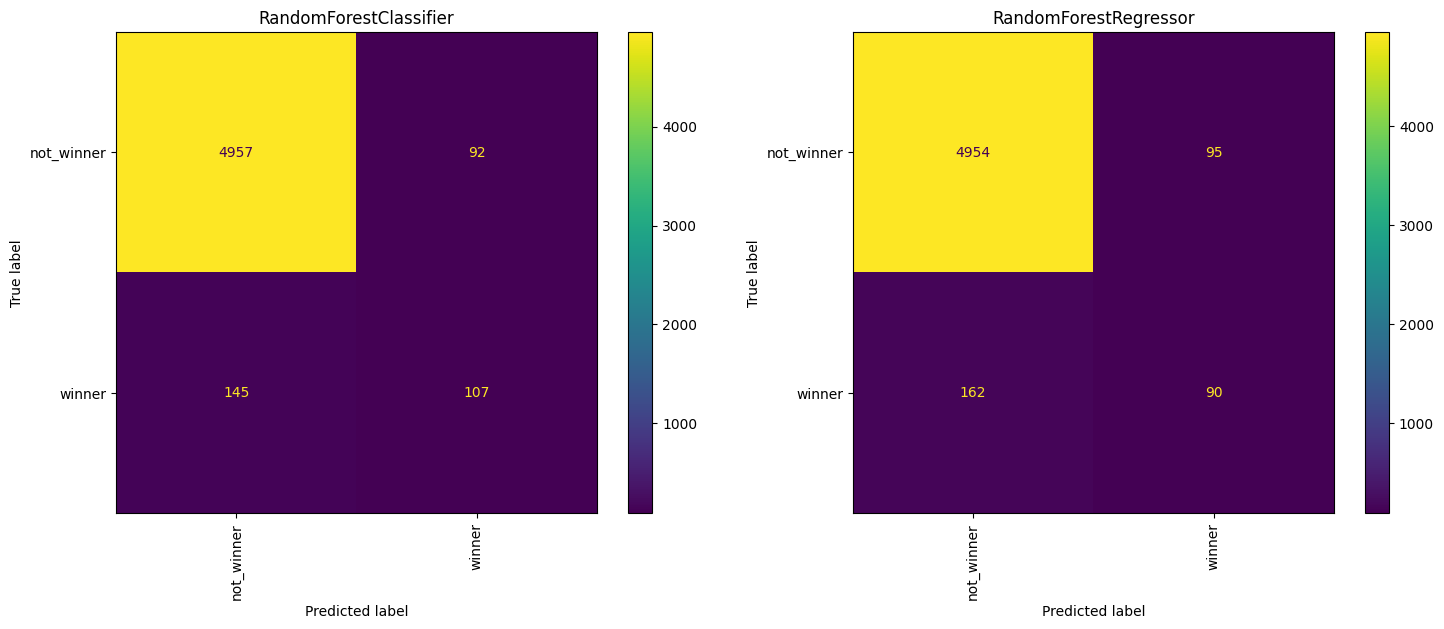

In [5]:
random_forest = (
    RandomForestClassifier(n_estimators=5, max_depth=8, criterion="gini", n_jobs=-1),
    RandomForestRegressor(
        n_estimators=5, max_depth=8, criterion="absolute_error", n_jobs=-1
    ),
)
model_test(random_forest, X, y, tscv, labels=labels)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25)):
CV with make_scorer(balanced_accuracy_score): 0.7452939814383674
CV with neg_mean_absolute_error: nan
              precision    recall  f1-score   support

  not_winner       0.98      0.98      0.98      5049
      winner       0.63      0.54      0.58       252

    accuracy                           0.96      5301
   macro avg       0.80      0.76      0.78      5301
weighted avg       0.96      0.96      0.96      5301

MLPRegressor(activation='logistic', hidden_layer_sizes=(60, 30)):
CV with make_scorer(balanced_accuracy_score): 0.5823168014975871
CV with neg_mean_absolute_error: -0.08021933358213568
              precision    recall  f1-score   support

  not_winner       0.96      0.99      0.98      5049
      winner       0.58      0.17      0.26       252

    accuracy                           0.95      5301
   macro avg       0.77      0.58      0.62      5301
weighted avg       0.94      0.95      0.94    

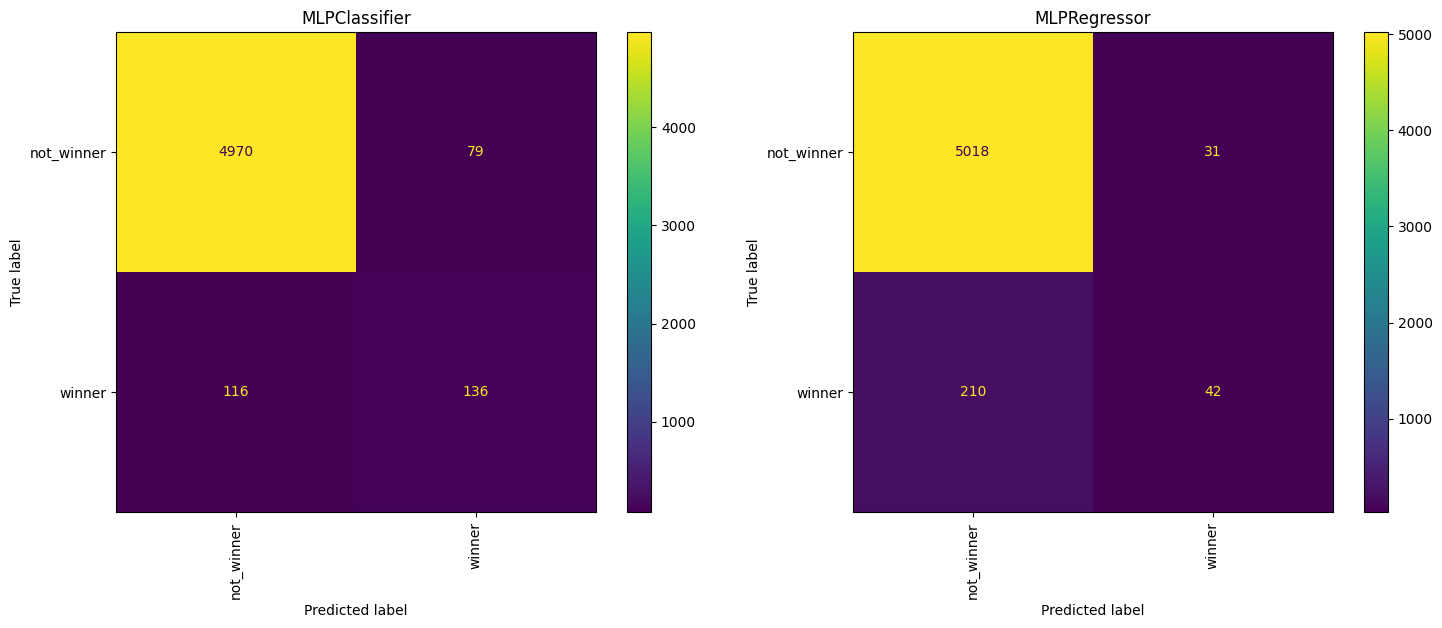

In [6]:
nn = (
    MLPClassifier(hidden_layer_sizes=(50, 25), activation="logistic"),
    MLPRegressor(hidden_layer_sizes=(60, 30), activation="logistic"),
)
model_test(nn, X, y, tscv, labels=labels)